In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
% matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df = df.dropna()
y = df.quality
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#преобразуем объекты для отображения на двухмерной плоскости
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df)
df['x'] = pca_df[:,0]
df['y'] = pca_df[:,1]

In [4]:
# выделим в отдельные датафреймы вино хорошего качества и плохого
df_0 = df[(df['quality'] == 3) | (df['quality'] == 4) | (df['quality'] == 5)].sort_values(by=['x', 'y'])
df_1 = df[(df['quality'] == 6) | (df['quality'] == 7) | (df['quality'] == 8)].sort_values(by=['x', 'y'])

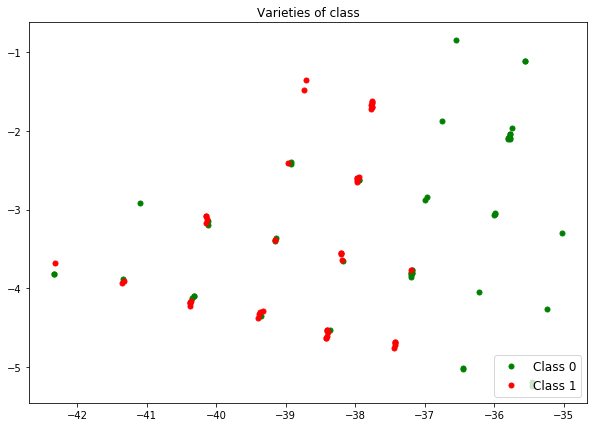

In [5]:
def plot_samples(marker='o',plot_show=True):
    plt.figure(figsize=[10, 7])
    # First 50 data belong to 0 class, plotted in green
    plt.plot(df_0['x'].iloc[:50], df_0['y'].iloc[:50], marker, color='green', markersize=5, label='Class 0')
    # First 50 data belong to 1 class, plotted in red
    plt.plot(df_1['x'].iloc[:50], df_1['y'].iloc[:50], marker, color='red', markersize=5, label='Class 1')
    
    if plot_show:
        plt.title('Varieties of class')
        plt.legend(loc='lower right', fontsize='large')
        plt.show()
    
plot_samples()

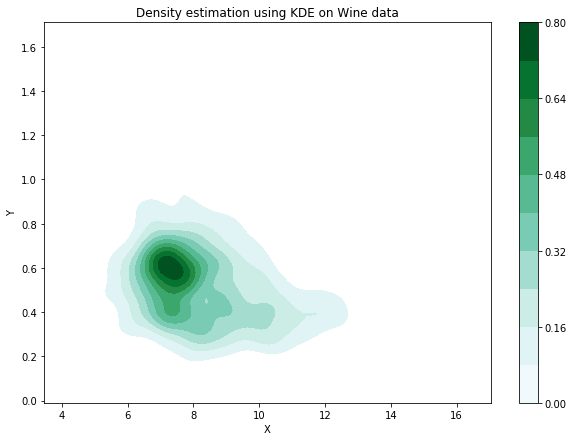

In [6]:
f, ax = plt.subplots(figsize=[10, 7])
sns.kdeplot(df, df.quality, ax=ax, shade=True, shade_lowest=False, cbar=True, legend=True);
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density estimation using KDE on Wine data');